In [309]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style


city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [159]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [160]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [161]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [162]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [163]:
city_data_df["type"].unique()
sum(city_data_df["type"]=="Rural")

18

In [164]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [165]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [166]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [167]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [168]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [169]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4.018030e+12,2,Rural


In [170]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [171]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [172]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [173]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [174]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

In [ ]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

In [ ]:
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [ ]:
import matplotlib as mpl

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [ ]:
pyber_data_df.groupby(["type"])

pyber_data_df["ride_id"].count()

ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents


In [ ]:
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [ ]:
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

In [ ]:
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [ ]:
rural_rides_count = sum(pyber_data_df["type"] == "Rural")
# rural_rides_count

urban_rides_count = sum(pyber_data_df["type"] == "Urban")
# urban_rides_count

suburban_rides_count = sum(pyber_data_df["type"] == "Suburban")
# suburban_rides_count



In [ ]:
drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
# drivers_count
# drivers_count["Urban"]


In [249]:
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares


KeyError: 'type'

In [185]:
avg_fare_urban_rider = total_fares["Urban"]/urban_rides_count
# avg_fare_urban_rider

avg_fare_rural_rider = total_fares["Rural"]/rural_rides_count
# avg_fare_rural_rider

avg_fare_suburban_rider = total_fares["Suburban"]/suburban_rides_count
# avg_fare_suburban_rider

In [186]:
avg_fare_urban_driver = total_fares["Urban"]/drivers_count["Urban"]
avg_fare_urban_driver

avg_fare_rural_driver = total_fares["Rural"]/drivers_count["Rural"]
avg_fare_rural_driver

avg_fare_suburban_driver = total_fares["Suburban"]/drivers_count["Suburban"]
avg_fare_suburban_driver

39.50271428571431

In [200]:
                                                                                                   
Pyber_Summary_data = {'Total Rides':[rural_rides_count,suburban_rides_count,urban_rides_count],
                    'Total Drivers':[drivers_count['Rural'],drivers_count['Suburban'],drivers_count['Urban']],
                    'Total Fares':[total_fares['Rural'],total_fares['Suburban'],total_fares['Urban']],
                    'Average Fare per Ride':[avg_fare_rural_rider,avg_fare_suburban_rider,avg_fare_urban_rider],
                    'Average Fare per Driver':[avg_fare_rural_driver,avg_fare_suburban_driver,avg_fare_urban_driver]
                                   }
  
pd.options.display.float_format = '${:,.2f}'.format
Pyber_Summary_df = pd.DataFrame(Pyber_Summary_data, columns = ['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver'],
                               index = ['Rural','Suburban','Urban'])

Pyber_Summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [260]:
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)

pyber_data_df.set_index("Date")

copy = pyber_data_df.copy()

# copy_df

copy_df = copy[['Date','City Type','Fare']]

copy_df.set_index('Date')





,City Type,Fare
Date,,
1/14/19 10:14,Urban,$13.83
3/4/19 18:24,Urban,$30.24
2/24/19 4:29,Urban,$33.44
2/10/19 23:22,Urban,$23.44
3/6/19 4:28,Urban,$34.58
...,...,...
4/29/19 17:04,Rural,$13.38
1/30/19 0:05,Rural,$20.76
2/10/19 21:03,Rural,$11.11


In [253]:
total_fares_copy = copy_df.groupby(["City Type"]).sum()["Fare"]
total_fares_copy

City Type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: Fare, dtype: float64

,index,Date,City Type,Fare
0,0,1/14/19 10:14,Urban,$13.83
1,1,3/4/19 18:24,Urban,$30.24
2,2,2/24/19 4:29,Urban,$33.44
3,3,2/10/19 23:22,Urban,$23.44
4,4,3/6/19 4:28,Urban,$34.58
...,...,...,...,...
2370,2370,4/29/19 17:04,Rural,$13.38
2371,2371,1/30/19 0:05,Rural,$20.76
2372,2372,2/10/19 21:03,Rural,$11.11
2373,2373,5/7/19 19:22,Rural,$44.94


,index,Date,City Type,Fare
0,0,1/14/19 10:14,Urban,$13.83
1,1,3/4/19 18:24,Urban,$30.24
2,2,2/24/19 4:29,Urban,$33.44
3,3,2/10/19 23:22,Urban,$23.44
4,4,3/6/19 4:28,Urban,$34.58
...,...,...,...,...
2370,2370,4/29/19 17:04,Rural,$13.38
2371,2371,1/30/19 0:05,Rural,$20.76
2372,2372,2/10/19 21:03,Rural,$11.11
2373,2373,5/7/19 19:22,Rural,$44.94


In [261]:
copy_df

,Date,City Type,Fare
0,1/14/19 10:14,Urban,$13.83
1,3/4/19 18:24,Urban,$30.24
2,2/24/19 4:29,Urban,$33.44
3,2/10/19 23:22,Urban,$23.44
4,3/6/19 4:28,Urban,$34.58
...,...,...,...
2370,4/29/19 17:04,Rural,$13.38
2371,1/30/19 0:05,Rural,$20.76
2372,2/10/19 21:03,Rural,$11.11
2373,5/7/19 19:22,Rural,$44.94


In [281]:
# copy_df['Date'] = pd.to_datetime(copy_df['Date'])
pivot_copy_df = pd.pivot_table(copy_df,index = copy_df['Date'],columns = ['City Type'],aggfunc = np.sum)
pivot_copy_df

pivot_copy_df.loc['2019-01-01':'2019-04-28']


Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:00  $nan     $nan $37.91
2019-01-01 00:46:00  $nan   $47.74   $nan
2019-01-01 02:07:00  $nan   $24.07   $nan
2019-01-01 03:46:00  $nan     $nan  $7.57
2019-01-01 05:23:00  $nan     $nan $10.75
...                   ...      ...    ...
2019-04-28 14:28:00  $nan     $nan $11.46
2019-04-28 16:29:00  $nan     $nan $36.42
2019-04-28 17:26:00  $nan     $nan $31.43
2019-04-28 17:38:00  $nan   $34.87   $nan
2019-04-28 19:35:00  $nan   $16.96   $nan

[2182 rows x 3 columns]

In [289]:
weekly_resample_data = pivot_copy_df.loc['2019-01-01':'2019-04-28'].Fare.resample('W').sum()

weekly_resample_data


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


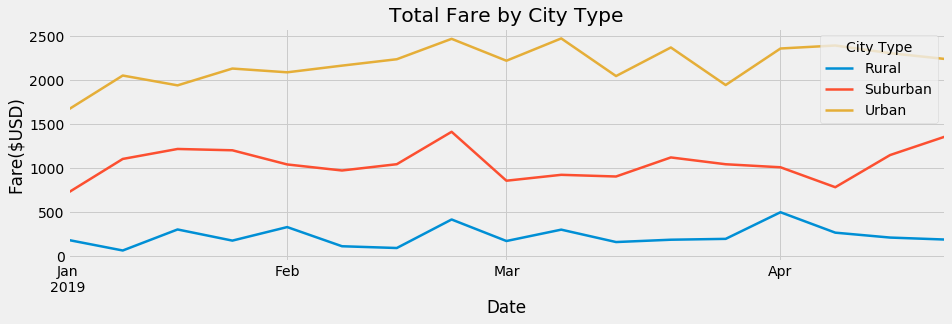

In [324]:

weekly_resample_data.plot.line(linewidth=2.5, figsize = (14,4))

plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

style.use('fivethirtyeight')

plt.legend(loc = 'upper right',title = 'City Type')
